Before clip
Image is (9627, 3741)


<Figure size 432x288 with 0 Axes>

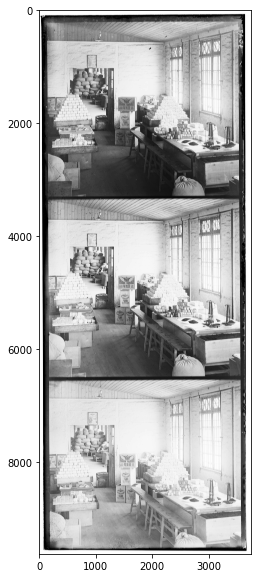

After clip
Image is (9338, 3366)


<Figure size 432x288 with 0 Axes>

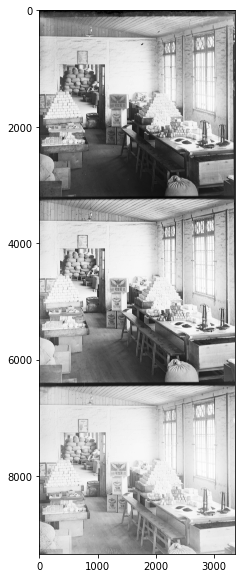

B is 


<Figure size 432x288 with 0 Axes>

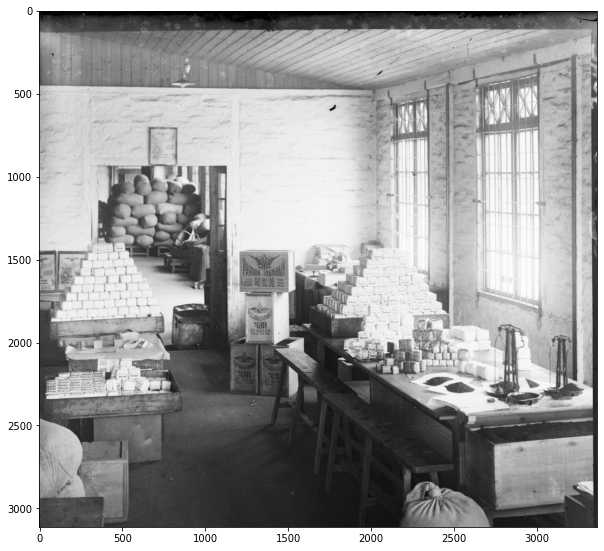

G is


<Figure size 432x288 with 0 Axes>

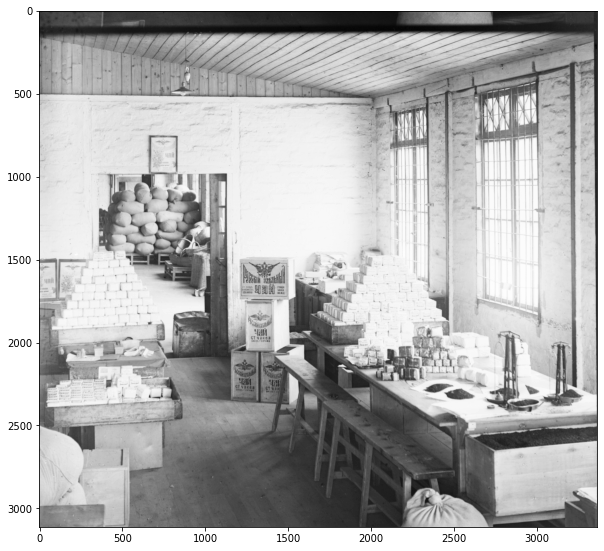

R is


<Figure size 432x288 with 0 Axes>

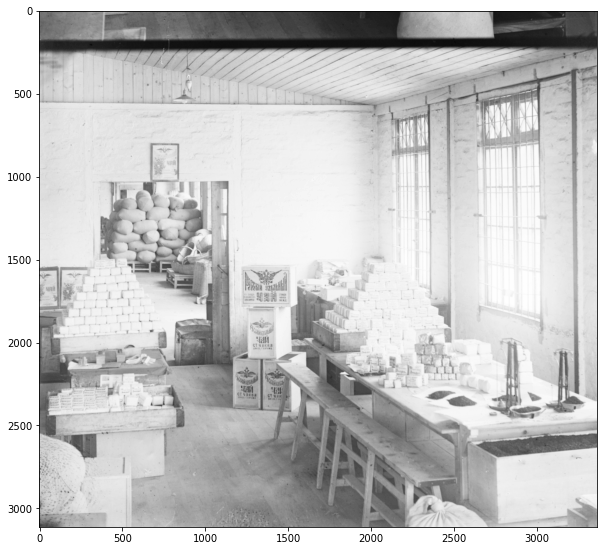

Pytamid cost 7.65943455696106
Processing pyramid level 5


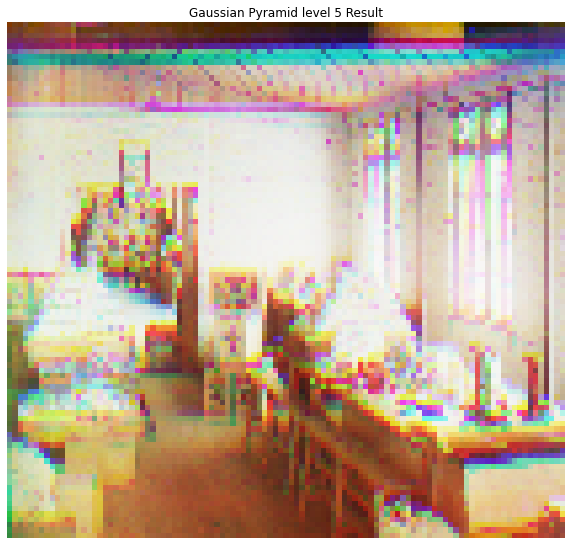

time: 0.08081579208374023
Processing pyramid level 4


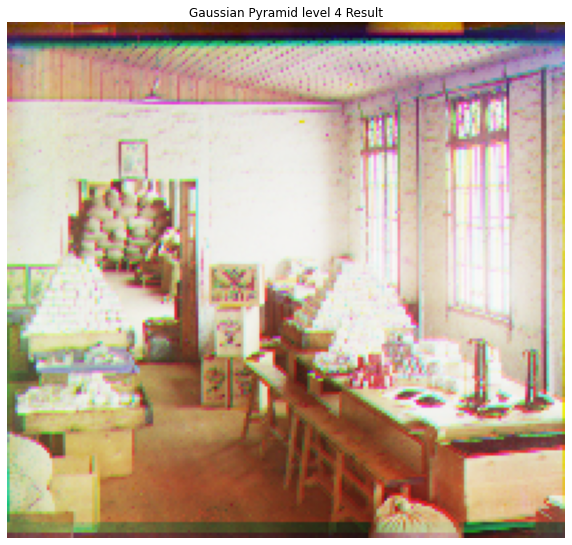

time: 0.19501805305480957
Processing pyramid level 3


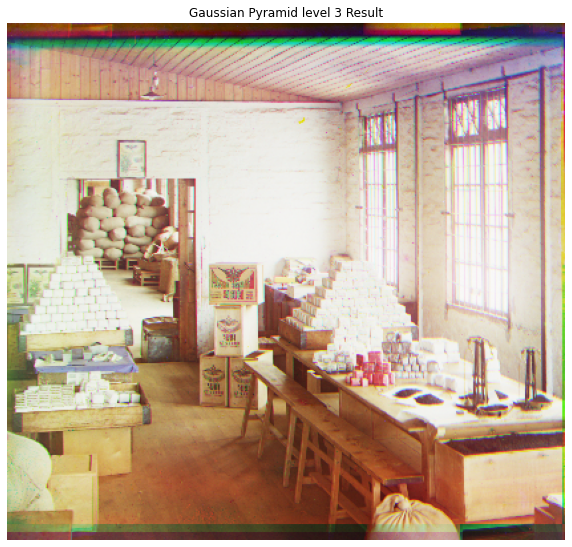

time: 0.2543513774871826
Processing pyramid level 2


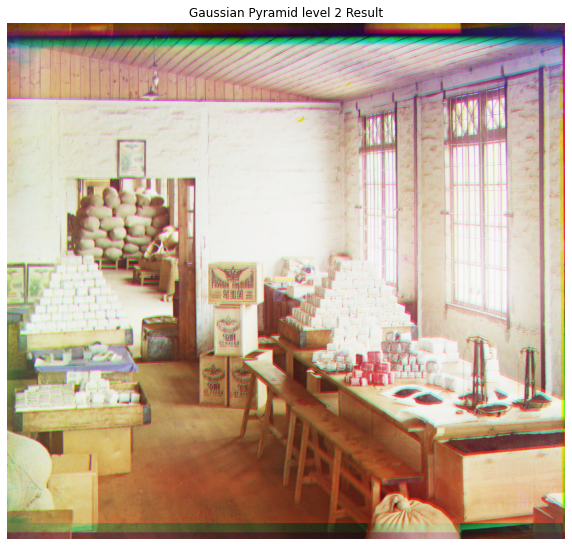

time: 0.5056471824645996
Processing pyramid level 1


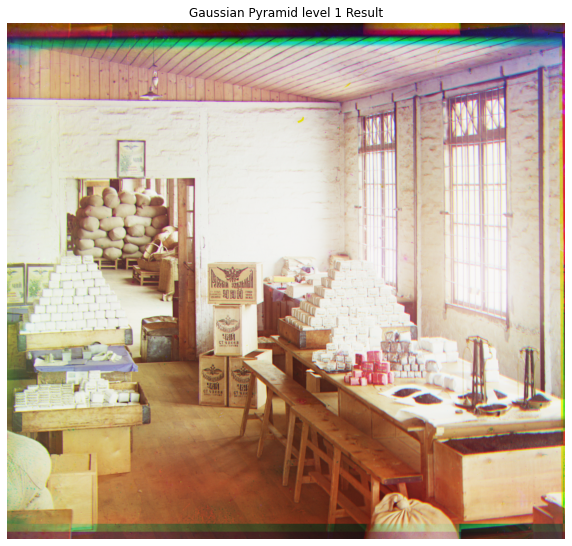

time: 1.8141295909881592
Processing pyramid level 0


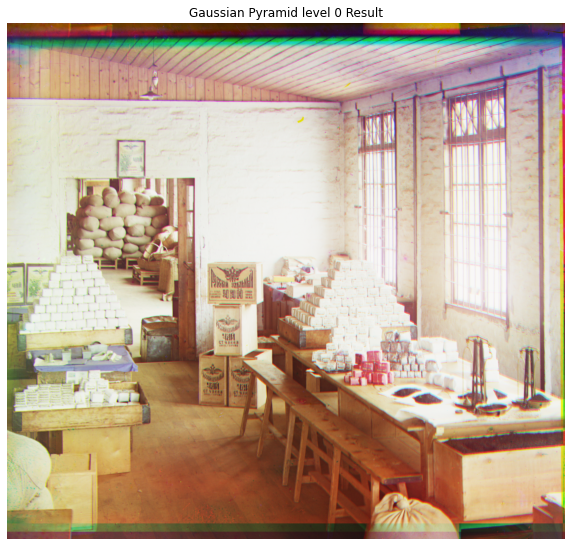

time: 7.919098138809204
alignGtoB is [-44   0] , alignRtoB is [-93 -12]


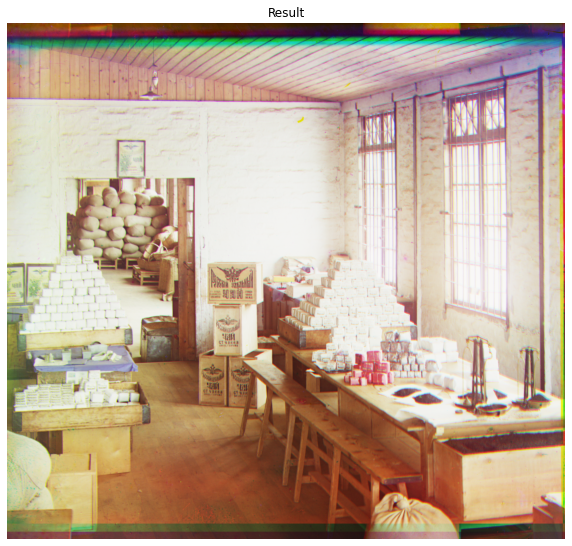

time : 0.7744512557983398


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import time
import cv2
import math
def Show_Image_RGB(image):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def Show_Image_gray(image):
    plt.clf()
    plt.figure(figsize=(10,10))
    plt.imshow(image,cmap = "gray")
    plt.show()

def nccAlign(a, b, t):
    max_ncc = -1
    ivalue=np.linspace(-t,t,2*t,dtype=int)
    jvalue=np.linspace(-t,t,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > max_ncc:
                max_ncc = nccDiff
                output = [i,j]
    return np.array(output)

def ncc(a_,b_):
    a = np.copy(a_)
    b = np.copy(b_)
    return np.mean(np.multiply((a-np.mean(a)),(b-np.mean(b))))/(np.std(a)*np.std(b))

def get_kernel(size=(3,3)):
    #assume sigma = 0.707
    #kernel size 3*3
    x,y =np.mgrid[-(math.floor(size[0]/2)):(math.ceil(size[0]/2)),-(math.floor(size[0]/2)):(math.ceil(size[0]/2))]
    kernel = np.exp(-(x**2+y**2))
    #Normalize
    kernel = kernel/kernel.sum()
    return kernel

def padding(img, size=(1, 1)):
    r_pad, c_pad = size
    row, column, ch = img.shape
    img_pad = np.zeros((row + 2 * r_pad, column + 2 * c_pad, ch), dtype=np.uint8)
    img_pad[r_pad:-r_pad, c_pad:-c_pad] = img[:, :]
    for c in range(column+c_pad*2):
        for i in range(c_pad):
            img_pad[i, c] = img_pad[c_pad, c]
            img_pad[c_pad+row+i, c] = img_pad[c_pad+row-1, c]
 
    for r in range(row+r_pad*2):
        for i in range(r_pad):
            img_pad[r, i] = img_pad[r, r_pad]
            img_pad[r, r_pad+column+i] = img_pad[r, r_pad+column-1]
    return img_pad

def zero_padding(img, size=(1,1)):
    r_pad, c_pad = size
    row, column, ch = img.shape
    img_pad = np.zeros((row + 2 * r_pad, column + 2 * c_pad, ch), dtype=np.uint8)
    img_pad[r_pad:-r_pad, c_pad:-c_pad] = img[:, :]
    return img_pad

def Conv2D(img, kernel):
    k_y, k_x = kernel.shape
    p_y = (k_y - 1) // 2
    p_x = (k_x - 1) // 2
    img = padding(img, (p_y, p_x))
    row, column, ch = img.shape
    output_img = np.copy(img)
    for y in range(p_y, row - p_y):
        for x in range(p_x, column - p_x):
            for c in range(ch):
                img_window = img[(y - p_y):(y + p_y) + 1, (x - p_x):(x +p_x) + 1, c]
                output_img[y, x, c] = np.sum(img_window * kernel)   
    
    output_img = output_img[p_y:-p_y, p_x:-p_x]
    return output_img

def subsampling(img, ratio):
    row, column, ch = img.shape
    sub_img = np.zeros((row//ratio, column//ratio, ch), dtype=np.uint8)
    for y in range(sub_img.shape[0]):
        for x in range (sub_img.shape[1]):
            sub_img[y][x] = img[int(y*ratio)][int(x*ratio)]
    return sub_img

def image_pyramid(img, kernel, num_layers=5, ratio=2):
    w , h , c = img.shape
    gaussian_pyramid = [img]
    laplacian_pyramid = []
    while w > 128 :
        #Gaussian pyramid
        previous_layer = gaussian_pyramid[-1]
        smooth_img = previous_layer
        #smooth_img = Conv2D(previous_layer, kernel)
        smooth_img = subsampling(smooth_img, ratio)
        gaussian_pyramid.append(smooth_img)
        w , h , c = smooth_img.shape
    return gaussian_pyramid
if __name__ == "__main__":
    # In this homework , do not need CONV
    img_Path = "./hw2_data/task3_colorizing/workshop.tif"
    image = cv2.imread(img_Path,cv2.IMREAD_GRAYSCALE)
    print(f"Before clip")
    print(f"Image is {image.shape}")
    Show_Image_gray(image)
    
    w , h = image.shape
    image = image[int(w*0.01):int(w-w*0.02),int(h*0.05):int(h-h*0.05)]
    print(f"After clip")
    print(f"Image is {image.shape}")
    Show_Image_gray(image)
    
    w , h = image.shape
    height = w//3
    
    Blue = image[0:height , :]
    Green = image[height:2*height,:]
    Red = image[2*height:3*height,:]
    print("B is ")
    Show_Image_gray(Blue)
    print("=====================================")
    print("G is")
    Show_Image_gray(Green)
    print("=====================================")
    print("R is")
    Show_Image_gray(Red)

# ## cv2
#     B_GP , G_GP , R_GP = [], [], []
#     B_GP.append(Blue)
#     G_GP.append(Green)
#     R_GP.append(Red)
#     while w > 128 :
#         B_GP.append(cv2.pyrDown(B_GP[-1]))
#         G_GP.append(cv2.pyrDown(G_GP[-1]))
#         R_GP.append(cv2.pyrDown(R_GP[-1]))
#         w , h = B_GP[-1].shape
# ## cv2

    start = time.time()
    kernel = get_kernel()
    Blue = Blue.reshape(Blue.shape[0],Blue.shape[1],1)
    Green = Green.reshape(Green.shape[0],Green.shape[1],1)
    Red = Red.reshape(Red.shape[0],Red.shape[1],1)
    B_GP = image_pyramid(Blue, kernel)
    G_GP = image_pyramid(Green, kernel)
    R_GP = image_pyramid(Red, kernel)
    end = time.time()
    print(f"Pytamid cost {end-start}")

    alignGtoB = np.zeros(2,dtype=int)
    alignRtoB = np.zeros(2,dtype=int)
    i = len(G_GP)-1
    while i >= 0 :
        print("==============================================")
        print(f"Processing pyramid level {i}")
        start = time.time()
        alignGtoB, alignRtoB = alignGtoB*2, alignRtoB*2
        G_GP[i] = np.roll(G_GP[i],alignGtoB,axis=(0,1))
        R_GP[i] = np.roll(R_GP[i],alignRtoB,axis=(0,1))

        result = (np.dstack((R_GP[i],G_GP[i],B_GP[i]))).astype(np.uint8)
        plt.figure(figsize=(10,10))
        plt.imshow(result)
        plt.title(f'Gaussian Pyramid level {i} Result') 
        plt.axis('off')
        plt.show()
    
        B_, G_, R_ = B_GP[i], G_GP[i], R_GP[i]
        alignGtoB_temp = nccAlign(B_,G_,3)
        alignRtoB_temp = nccAlign(B_,R_,3)
        alignGtoB += alignGtoB_temp
        alignRtoB += alignRtoB_temp
        i -= 1
        end = time.time()
        print(f"time: {end-start}")
    print("==============================================")
    print(f"alignGtoB is {alignGtoB} , alignRtoB is {alignRtoB}")
    start = time.time()
    Green = np.roll(Green,alignGtoB,axis=(0,1))
    Red = np.roll(Red,alignRtoB,axis=(0,1))
    result = (np.dstack((Red,Green,Blue))).astype(np.uint8)
    plt.figure(figsize=(10,10)), plt.imshow(result)
    plt.title('Result'), plt.axis('off')
    plt.show()
    end = time.time()
    print(f"time : {end-start}")

    
    

    